#### __This notebook is used to check for abnormalities during special events which could cause irrgegularities in the data.__
For example new years, eastern and covid isolation. 

_Common sources of PM10 particles include:_  
 dust from unsealed roads  
 smoke from fires  
 sea salt   
 car and truck exhausts  
 industry  

#### _To-Do:_  
- [ x ] Combine December and January of following years to gauge the spike of pm10 on new years  
- [ ] Look at March of a specific year outside of covid years  
- [ ] Get averages of each year and compare to average of covid years -- move this task to the seaborn notebook

#### _Unterstützende Quellen_
https://www.hamburg.de/contentblob/18482644/f08783286efb17f169a36876e2a62eb9/data/pdf-osterfeuerbericht-2024.pdf  

#### _ANMERKUNGEN_
- im März Datenset ist die datetime Spalte vom Typ Objekt und nicht vom Typ datetime -> typecasting
- Umgang mit Sommer- & Winterzeit, ahhh -> Einheitliche Zeitzone UTC? Löschen von überschüssiger Stunde und Auffüllen fehlender Stunde mit Durchschnittswert
- Ostersonntag - broken sensor??
- Umgang fehlender Messwerte: bei 1ner Stunde Mittelwert h(n-1) & h(n+1) -> Abgesprochen und zugestimmt

#### _IMPORTS_

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json

# OSTERN

### KARFREITAG, SAMSTAG & SONNTAG

In [2]:
file_path_march = os.path.join("..", "mc124_data","mc124_data_2024_03.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path_march)
df_pm10_march = df[(df['core'] == 'pm10')]
df_pm10_march.head(2)

,datetime,station,core,component,period,value
0,2024-03-31T23:00:00+02:00,mc124,pm10,pm10_1h,1h,74.0
5,2024-03-31T22:00:00+02:00,mc124,pm10,pm10_1h,1h,75.0


In [3]:
#df_pm10_march.describe()
df_pm10_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 3710
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   datetime   743 non-null    object 
 1   station    743 non-null    object 
 2   core       743 non-null    object 
 3   component  743 non-null    object 
 4   period     743 non-null    object 
 5   value      743 non-null    float64
dtypes: float64(1), object(5)
memory usage: 40.6+ KB


In [4]:
# turn datetime object into datetime
df_pm10_march['datetime'] = pd.to_datetime(df_pm10_march['datetime'], utc=True)
#df_pm10_march['datetime'].dt.tz_convert('UTC')  #quick fix but also didn't work the way it was supposed to
#df_pm10_march.describe()
df_pm10_march.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 3710
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   datetime   743 non-null    datetime64[ns, UTC]
 1   station    743 non-null    object             
 2   core       743 non-null    object             
 3   component  743 non-null    object             
 4   period     743 non-null    object             
 5   value      743 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 40.6+ KB


C:\Users\a_n_n\AppData\Local\Temp\ipykernel_2248\3768671233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm10_march['datetime'] = pd.to_datetime(df_pm10_march['datetime'], utc=True)


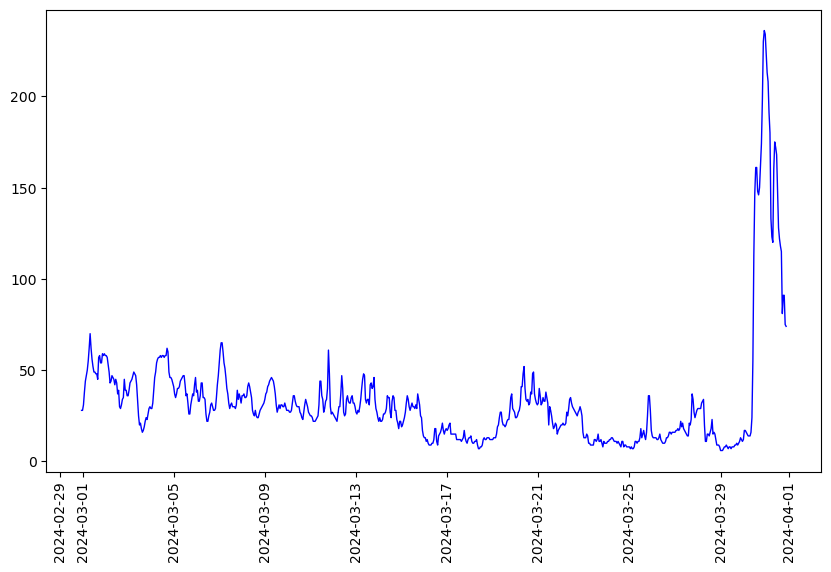

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(df_pm10_march['datetime'], df_pm10_march['value'], color="blue", linewidth=1)
plt.xticks(rotation=90)
plt.show()

### Karfreitag bis Ostersonntag

In [6]:
# Multiple days
#targeting specific days which show abnormal numbers:
start_date = '2024-03-29'
end_date = '2024-03-31'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_end_march = df_pm10_march[(df_pm10_march['datetimeConverted'].dt.date  >= start_date.date()) & 
                           (df_pm10_march['datetimeConverted'].dt.date <= end_date.date())]

plt.plot(df_filtered_end_march['datetimeConverted'], df_filtered_end_march['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

KeyError: 'datetimeConverted'

### Ostersamstag & Ostersonntag

In [ ]:
# Multiple days
#targeting specific days which show abnormal numbers:
start_date = '2024-03-30'
end_date = '2024-03-31'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_end_march = df_pm10_march[(df_pm10_march['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_march['datetime'].dt.date <= end_date.date())]

plt.plot(df_filtered_end_march['datetime'], df_filtered_end_march['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on Ostersamstag & Ostersonntag')
#plt.xticks(df_filtered_days['hour'])
plt.xticks(rotation=90)
plt.show

### Ostersamstag

In [ ]:
target_day = '2024-03-30'
df_2024_03_30 = df_pm10_march[df_pm10_march['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_03_30["hour"] = df_2024_03_30["datetime"].map(cutDatetimeToHour)
#df_2024_03_30.sample()

plt.plot(df_2024_03_30['hour'], df_2024_03_30['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_03_30['hour'])
plt.show

In [ ]:
df_2024_03_30.describe()

### Ostersonntag

In [ ]:
# Single day
target_day = '2024-03-31'
df_2024_03_31 = df_pm10_march[df_pm10_march['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_03_31["hour"] = df_2024_03_31["datetime"].map(cutDatetimeToHour)
#df_2024_03_31.sample()

plt.plot(df_2024_03_31['hour'], df_2024_03_31['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_03_31['hour'])
plt.show

In [ ]:
df_2024_03_31.head()
df_2024_03_31.info()

### Ostermontag

In [ ]:
file_path_april = os.path.join("..", "mc124_data","mc124_data_2024_04.json") # join because different os use either \ or / as file path seperators
df = pd.read_json(file_path_april)
df_pm10_april = df[(df['core'] == 'pm10')]
df_pm10_april.tail(2)

In [ ]:
#df_pm10_april.describe()
df_pm10_april.info()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_pm10_april['datetime'], df_pm10_april['value'], color="blue", linewidth=1)
#plt.xticks(df_pm10['datetime'])
plt.xticks(rotation=90)
plt.show

In [ ]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-01'
end_date = '2024-04-03'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_days = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

In [ ]:
plt.plot(df_filtered_days['datetime'], df_filtered_days['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

In [ ]:
target_day = '2024-04-01'
df_2024_04_01 = df_pm10_april[df_pm10_april['datetime'].dt.date == pd.to_datetime(target_day).date()]
def cutDatetimeToHour(datetime):
    return datetime.hour

df_2024_04_01["hour"] = df_2024_04_01["datetime"].map(cutDatetimeToHour)
df_2024_04_01.info()

In [ ]:
plt.plot(df_2024_04_01['hour'], df_2024_04_01['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.title(f'Plot of Value on {target_day}')
plt.xticks(df_2024_04_01['hour'])
plt.show

### Analyse unerwarteter Auffälligkeit Mitte April

In [ ]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-07'
end_date = '2024-04-12'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_mid_april = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

In [ ]:
plt.plot(df_filtered_mid_april['datetime'], df_filtered_mid_april['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.xticks(rotation=90)
plt.show

In [ ]:
#targeting specific days which show abnormal numbers:
start_date = '2024-04-08'
end_date = '2024-04-10'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_mid_april = df_pm10_april[(df_pm10_april['datetime'].dt.date >= start_date.date()) & 
                           (df_pm10_april['datetime'].dt.date <= end_date.date())]

plt.plot(df_filtered_mid_april['datetime'], df_filtered_mid_april['value'], color="blue", linewidth=1)
plt.xlabel('Hour of Day')
plt.ylabel('pm10 value')
plt.xticks(rotation=90)
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

08.04. (Di) sowie 09.04. (Mi) auffällig
Anmerkung: besondere Events?

### Karfreitag bis Ostermontag

In [ ]:
df_march_april = pd.concat([df_pm10_march, df_pm10_april])
df_march_april.describe()

In [ ]:
df_march_april.info()

In [ ]:
df_march_april['datetime'] = df_march_april['datetime'] = pd.to_datetime(df_march_april['datetime'], utc=True).dt.tz_convert('UTC') 
df_march_april.info()

In [ ]:
#targeting specific days which show abnormal numbers:
start_date = '2024-03-29'
end_date = '2024-04-1'

# Convert the dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Filter the dataframe for the specified date range
df_filtered_easter = df_march_april[(df_march_april['datetime'].dt.date >= start_date.date()) & 
                           (df_march_april['datetime'].dt.date <= end_date.date())]

#TODO FIX THE PLOT WITH THE SOLUTION FROM NEW YEAR NOTEBOOK
plot_df_easter = df_filtered_easter.set_index('datetime').sort_index()
plt.figure(figsize=(10, 6))
plt.plot(plot_df_easter[['value']], color="blue", linewidth=1)
#plt.plot(df_filtered_easter['datetime'], df_filtered_easter['value'], color="blue", linewidth=1)
plt.xlabel('Day and hour in 12h steps')
plt.ylabel('pm10 value')
plt.xticks(rotation=90)
#plt.title(f'Plot of Value on {target_day}')
#plt.xticks(df_filtered_days['hour'])
plt.show

### CRITIQUE: HAD TO CONVERT TO UTC TO LOOK AT SINGLE DAYS -- I COULD'VE ALSO FILTERED DIFFERENTLY